# **SUPPORT VECTOR MACHINE REGRESSION**

**A Support Vector Machine (SVM)** is a powerful and versatile Machine Learning
model, capable of performing linear or nonlinear **classification, regression, and even outlier detection**. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.

**The advantages of support vector machines are:**


---

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- **Versatile:** different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

---

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (**numpy.ndarray** and convertible to that by **numpy.asarray**) and sparse (any **scipy.sparse**) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered **numpy.ndarray** (dense) or **scipy.sparse.csr_matrix (sparse) with dtype=float64**.

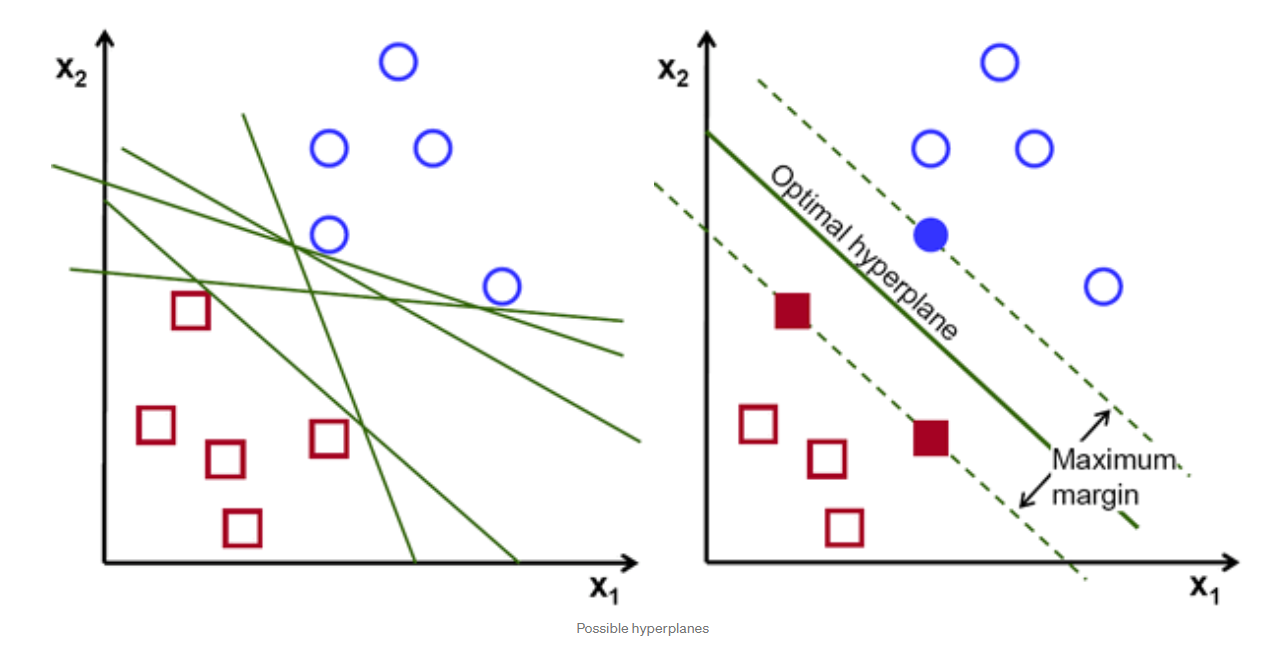

To separate the two classes of data points, there are many possible **hyperplanes** that could be chosen. Our objective is to find a plane that has the **maximum margin**, i.e the maximum distance between data points of both classes. **Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.**

## **Introduction to Support Vector Regression (SVR)**

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems.

Let’s spend a few minutes understanding the idea behind SVR.

## **The Idea Behind Support Vector Regression**
The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/SVR1.png)

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

![alt text](https://lh6.googleusercontent.com/proxy/avyxeSrYx1Xcrr0lhzJZZEU0JkXwqIAvrkFNxCLYmybXmfYCHnH9HxnwVPsfuUErMCK_fNclx1GOFhUD)


Assuming that the equation of the hyperplane is as follows:
```
Y = wx+b (equation of hyperplane)
```

Then the equations of decision boundary become:
```
wx+b= +a

wx+b= -a
```
Thus, any hyperplane that satisfies our SVR should satisfy:
```
-a < Y- wx+b < +a
```

**Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.**


In [1579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [1580]:
data=pd.read_excel("./multiple_linear_regression/startups_50.xlsx")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [1581]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [1582]:
data.isna().count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [1583]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [1584]:
x=data.iloc[:,0:1]
y=data.iloc[:,-1:]

In [1585]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ("Standarad Scaler",StandardScaler(),[0]),
    ],
    remainder="passthrough"
)

In [1586]:
x=ct.fit_transform(x)

In [1587]:
x[:5]

array([[2.01641149],
       [1.95586034],
       [1.75436374],
       [1.55478369],
       [1.5049372 ]])

In [1588]:
sc_y=StandardScaler()
y=sc_y.fit_transform(y)
y[:5]

array([[2.01120333],
       [1.99942997],
       [1.98084225],
       [1.77662724],
       [1.35774012]])

In [1589]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="mean")
x=impute.fit_transform(x)

In [1590]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=47)

### **Explanation:**
- In the above code, the first line is used for splitting arrays of the dataset into random train and test subsets.
- In the second line, we have used four variables for our output that are
 - **x_train:** features for the training data
 - **x_test:** features for testing data
 - **y_train:** Dependent variables for training data
 - **y_test:** Independent variable for testing data

- In the **train_test_split()** function, we have passed four parameters in which the first two are for arrays of data, and test_size is for specifying the size of the test set. The test_size may be .5, .3, or .2, which tells the dividing ratio of training and testing sets.

The last parameter **random_state** is used to set a seed for a random generator so that you always get the same result, and the most used value for this is 42.

For our program we will split the dataset as follows:



In [1591]:
from sklearn.svm import SVR
svr=SVR(kernel="linear",C=1,epsilon=0.1)

In [1592]:
svr.fit(x_train,y_train)

c:\Users\S\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

In [1593]:
svr.score(x_train,y_train)

0.9456587455096309

In [1594]:
y_test.ravel()

array([-0.84641135, -1.01536466, -0.36552389,  0.55874952, -0.77709368,
       -0.3026246 , -0.36412744, -0.01753384,  0.74115484, -0.5529549 ,
       -0.11549309, -0.17554233, -0.38178711])

In [1595]:
y_pred=svr.predict(x_test)
y_pred

array([-0.93318984, -1.04031664, -0.20717021,  0.39166071, -0.72779022,
       -0.23680176, -0.25477914,  0.1066767 ,  0.4308661 , -0.61232441,
       -0.18085989, -0.02492979, -0.37298922])

In [1596]:
svr.score(x_test,y_test)

0.9274431168907246

In [1597]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9274431168907246

In [1598]:
df=pd.read_csv("multiple_linear_regression\cleaned_bengluru_house_data.csv")
df.head(10)

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,43.0,2
5,Devarachikkanahalli,1130.0,2.0,36.0,2
6,Devarachikkanahalli,1417.0,2.0,76.0,3
7,Devarachikkanahalli,1230.0,2.0,58.0,2
8,Devarachikkanahalli,1705.0,3.0,75.0,3
9,Devarachikkanahalli,1116.0,2.0,47.0,2


In [1599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7172 non-null   object 
 1   total_sqft  7172 non-null   float64
 2   bath        7172 non-null   float64
 3   price       7172 non-null   float64
 4   bhk         7172 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 280.3+ KB


In [1600]:
df.location.value_counts()

location
other                    1134
Whitefield                240
Sarjapur  Road            191
Electronic City           161
Raja Rajeshwari Nagar     137
                         ... 
HAL 2nd Stage               4
Nagasandra                  4
Vishveshwarya Layout        4
Marsur                      3
Banjara Layout              3
Name: count, Length: 242, dtype: int64

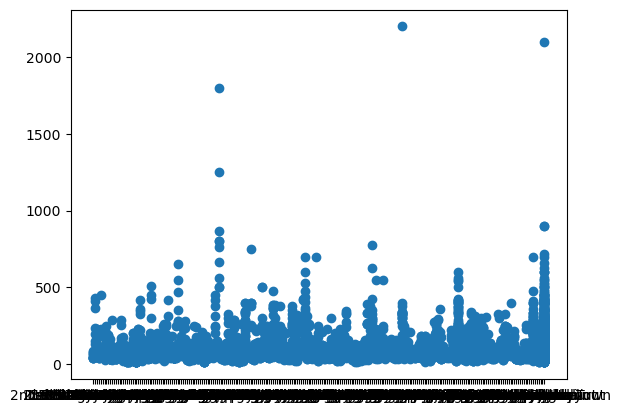

In [1601]:
plt.scatter(df.location,df.price)

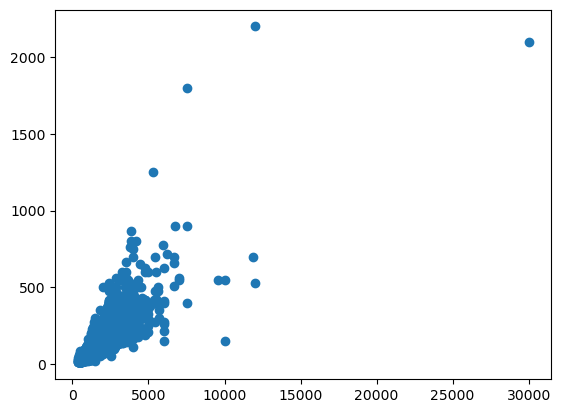

In [1602]:
plt.scatter(df["total_sqft"],df.price)

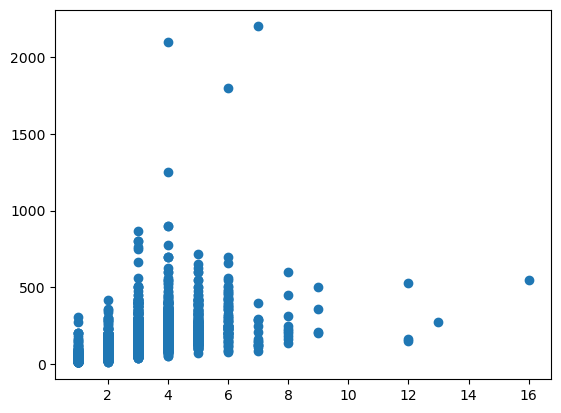

In [1603]:
plt.scatter(df.bath,df.price)

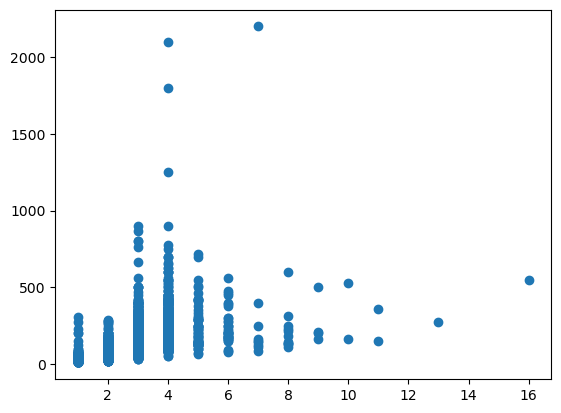

In [1604]:
plt.scatter(df.bhk,df.price)

In [1605]:
x=df.drop("price",axis=1)
x.head()

,location,total_sqft,bath,bhk
0,Devarachikkanahalli,1250.0,2.0,2
1,Devarachikkanahalli,1200.0,2.0,2
2,Devarachikkanahalli,1170.0,2.0,2
3,Devarachikkanahalli,1425.0,2.0,3
4,Devarachikkanahalli,947.0,2.0,2


In [1606]:
y=df.price
y.head()

0    40.0
1    83.0
2    40.0
3    65.0
4    43.0
Name: price, dtype: float64

In [1607]:
y.shape

(7172,)

In [1608]:
x.shape

(7172, 4)

In [1609]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
    [
        ("ONE HOT ENCODING",OneHotEncoder(),[0]),
        ("Standard Scaler",StandardScaler(),[1,2,3]),
    ],
    remainder="passthrough",
)
x=ct.fit_transform(x)


In [1610]:
x.shape

(7172, 245)

In [1611]:
x=x[:,1:]
x.shape

(7172, 244)

In [1612]:
x[:1]

<1x244 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [1613]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [1614]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
lrg=LinearRegression()

In [1615]:
lrg.fit(x_train,y_train)

LinearRegression()

In [1616]:
svr=SVR(kernel="linear",C=1000,epsilon=0.1)
svr.fit(x_train,y_train)

SVR(C=1000, kernel='linear')

In [1617]:
print("LinearRegression Score :",lrg.score(x_train,y_train))
print("SVR Score :",svr.score(x_train,y_train))

LinearRegression Score : 0.8575723118108907
SVR Score : 0.8440346486639032


In [1618]:
lrgy_pred=lrg.predict(x_test)
lrgy_pred

array([ 42.06775511,  92.49272816, 114.62481982, ...,  72.55925287,
        90.01793616, 327.02871232])

In [1619]:
svry_pred=svr.predict(x_test)
svry_pred

array([ 41.4556483 ,  98.10561954, 103.58328302, ...,  70.15806428,
        79.78414739, 315.94866917])

In [1620]:
y_test.ravel()

array([ 49. , 110. , 200. , ...,  65.5,  90. , 415. ])

In [1621]:
print("LinearRegression Score :",lrg.score(x_test,y_test))
print("SVR Score :",svr.score(x_test,y_test))

LinearRegression Score : 0.8423822638237418
SVR Score : 0.8450920762752164


Transforming features into high dimensional 

In [1622]:
from sklearn.preprocessing import PolynomialFeatures
plf=PolynomialFeatures(degree=2,include_bias=False)

In [1623]:
x=plf.fit_transform(x)
x.shape

(7172, 30134)

In [1676]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)
lrg1=LinearRegression()
svr1=SVR(kernel="linear",epsilon=0.1,C=5)

In [1677]:
lrg1.fit(x_train,y_train)
svr1.fit(x_train,y_train)

SVR(C=5, kernel='linear')

In [1678]:
print("Training Accuracy:")
print("LinearRegression Score :",lrg1.score(x_train,y_train))
print("SVR Score :",svr1.score(x_train,y_train))

Training Accuracy:
LinearRegression Score : 0.9397883039920315
SVR Score : 0.9137183961421923


In [1679]:
print("Testing Accuracy:")
print("LinearRegression Score :",lrg1.score(x_test,y_test))
print("SVR Score :",svr1.score(x_test,y_test))

Testing Accuracy:
LinearRegression Score : 0.8945811704831275
SVR Score : 0.8922021599155868
